## Rolling Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

## Function to calculate ols regressions
from scipy.stats import linregress

In [7]:
# N = number of observations
N = 500

## x_t is a random walk
x = np.cumsum(np.random.normal(size=N))

## Derek's & Chris's parameter values
a = .22
b = 7.0

## Normal disturbances
z = np.random.normal(size=N,loc=0.0, scale=2.2)

## Y is cointegrated with x
y = a + b * x + z

In [8]:
import matplotlib.pyplot as plt

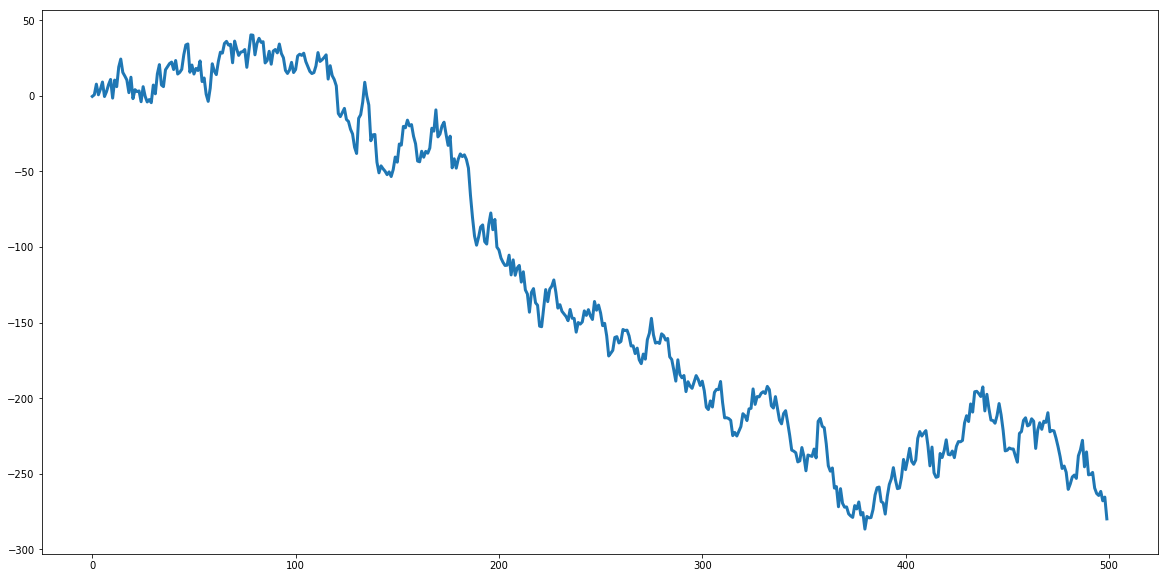

In [9]:
plt.plot(y, linewidth=3)

In [10]:
## First difference spot prices
dS = np.diff(y)

## First difference futures prices
dF = np.diff(x)

In [11]:
dS[:10]

array([  1.08218825,   7.01912312,  -7.03186555,   3.71625842,
         4.71503921,  -9.58191775,   3.27267058,   4.61398977,
         3.39842824, -12.34287124])

In [12]:
dS[-10:]

array([-15.14834492,   0.26609448,   1.34600253, -10.30557965,
        -3.67604018,  -1.2743138 ,   2.67336102,  -6.19360151,
         2.43568124, -14.39393888])

In [13]:
dF[:10]

array([ 0.34117558,  0.29366155, -0.60323595,  1.00546781,  0.1445845 ,
       -1.0599019 , -0.04789633,  0.7934035 ,  0.47032864, -1.44881429])

In [14]:
dF[-10:]

array([-2.27463395,  0.33439526, -0.08384676, -0.99054924, -0.77672123,
        0.024811  ,  1.13444121, -1.40867704,  0.09352651, -1.52450305])

In [15]:
dS.shape

(499,)

In [16]:
dF.shape

(499,)

In [17]:
## Number of lookback observations in moving estimation window
M = 60

## The length of the sample for estimated hedge ratios (taking into account that we require M initial observations for our first h)
L = N - M

In [18]:
## Empty storate array for estimated rolling hedge ratios
h = np.empty(L)

In [19]:
## starting indices for 60-days rolling window
ibeg = 0
iend = 60

for i in range(L):
    reg = linregress(dF[ibeg:iend], dS[ibeg:iend])
    h[i] = reg.slope
    ibeg += 1
    iend += 1

In [20]:
## Turn the estimated hedge ratios into a pandas series for convenience
ts = pd.Series(h)

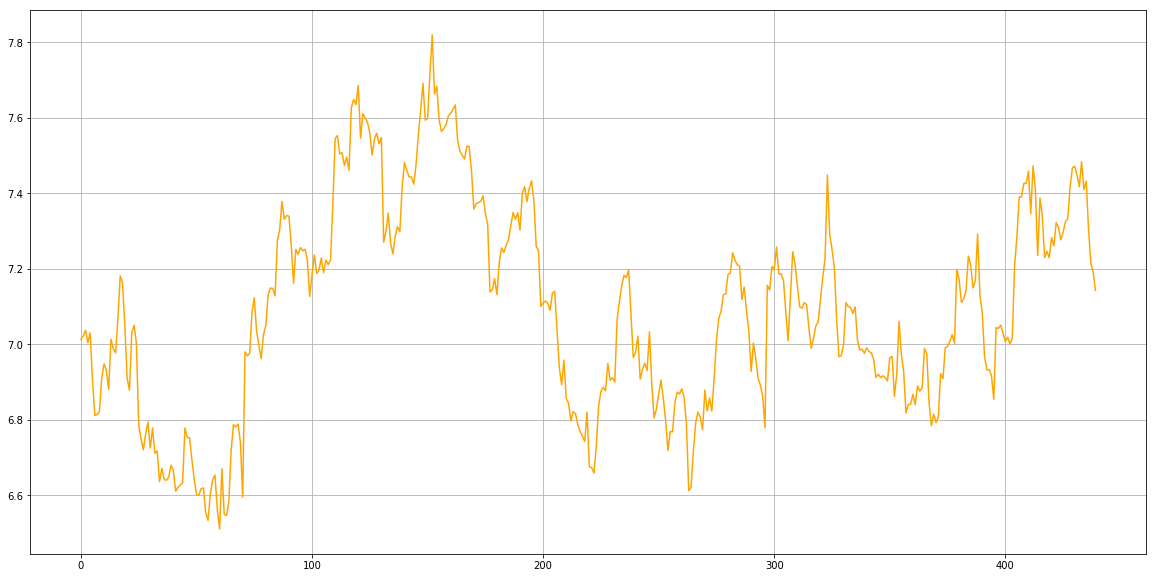

In [21]:

## ... such as plotting
ts.plot(grid=True, color="orange")

## Tutorial on Reading Data into Pandas DataFrame from CSV File

In [22]:
inFile = "./data/WTI-Prices-1992-to-1993.csv"

In [23]:
df = pd.read_csv(inFile, parse_dates=True)

In [24]:
whos

Variable     Type                Data/Info
------------------------------------------
L            int                 440
M            int                 60
N            int                 500
a            float               0.22
ax           AxesSubplot         AxesSubplot(0.125,0.125;0.775x0.755)
b            float               7.0
dF           ndarray             499: 499 elems, type `float64`, 3992 bytes
dS           ndarray             499: 499 elems, type `float64`, 3992 bytes
df           DataFrame                      Date   Spot  F<...>n\n[500 rows x 3 columns]
fig          Figure              Figure(432x288)
h            ndarray             440: 440 elems, type `float64`, 3520 bytes
i            int                 439
ibeg         int                 440
iend         int                 500
inFile       str                 ./data/WTI-Prices-1992-to-1993.csv
linregress   function            <function linregress at 0x7f0a01456b70>
np           module              <module 

In [25]:
df.head()

,Date,Spot,Futures
0,1992-01-02,19.43,19.49
1,1992-01-03,19.22,19.23
2,1992-01-06,19.24,19.21
3,1992-01-07,18.72,18.69
4,1992-01-08,17.95,17.87


In [26]:
df.tail()

,Date,Spot,Futures
495,1993-12-23,14.48,14.48
496,1993-12-27,14.09,14.13
497,1993-12-28,14.11,14.11
498,1993-12-29,14.45,14.44
499,1993-12-30,14.19,14.17


In [27]:
spot = df.Spot.values
futures = df.Futures.values

In [28]:
whos

Variable     Type                Data/Info
------------------------------------------
L            int                 440
M            int                 60
N            int                 500
a            float               0.22
ax           AxesSubplot         AxesSubplot(0.125,0.125;0.775x0.755)
b            float               7.0
dF           ndarray             499: 499 elems, type `float64`, 3992 bytes
dS           ndarray             499: 499 elems, type `float64`, 3992 bytes
df           DataFrame                      Date   Spot  F<...>n\n[500 rows x 3 columns]
fig          Figure              Figure(432x288)
futures      ndarray             500: 500 elems, type `float64`, 4000 bytes
h            ndarray             440: 440 elems, type `float64`, 3520 bytes
i            int                 439
ibeg         int                 440
iend         int                 500
inFile       str                 ./data/WTI-Prices-1992-to-1993.csv
linregress   function            <func

In [29]:
dF = np.diff(futures)
dS = np.diff(spot)

In [30]:
dF.shape

(499,)

In [31]:
dS.shape

(499,)

In [32]:
M = 60
N = dS.shape[0]
L = N - M

In [33]:
## starting indices for 60-days rolling window
ibeg = 0
iend = 60

h = np.empty(L)

for i in range(L):
    reg = linregress(dF[ibeg:iend], dS[ibeg:iend])
    h[i] = reg.slope
    ibeg += 1
    iend += 1

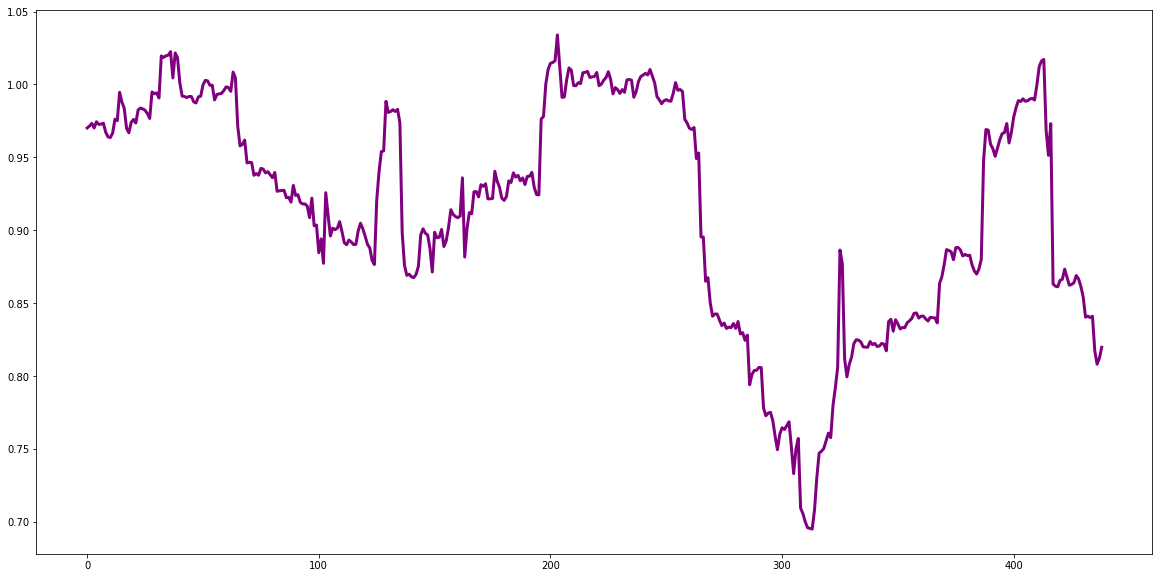

In [34]:

plt.plot(h, linewidth=3, color="purple")


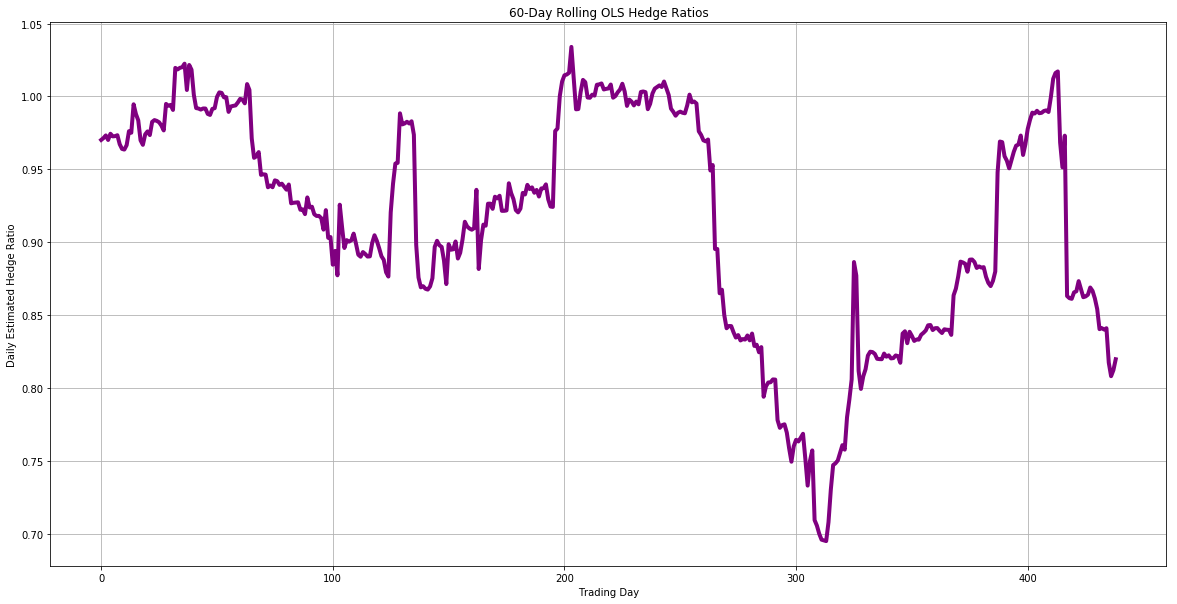

In [37]:
fig, ax = plt.subplots()
ax.grid(True)
plt.title("60-Day Rolling OLS Hedge Ratios")
plt.ylabel("Daily Estimated Hedge Ratio")
plt.xlabel("Trading Day")
plt.plot(h, linestyle='-', linewidth=4, color="purple")
plt.savefig("SixtyDayRollingHedgeRatios.png")